# **Exploratory Data Analysis:**

- `year and month`: Date information (time-based analysis)

- `supplier`: Supplier/manufacturer name

- `item code`: Unique code for item (for tracking)

- `item description`: Description/name of the product

- `item type`: Category/type of item (e.g., wine, vodka)

- `retail sales`: Retail-level sold quantity (to customers)

- `retail transfers`: Transfers between retail stores

- `warehouse sales`: Inventory sold from warehouse (to retail)

In [2]:
#  Disable future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
%matplotlib inline

Import `data` from our preparation document:

In [5]:
from Data_Cleaning_and_Preparation import load_and_prepare_data

data = load_and_prepare_data()

In [6]:
data

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,jan,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,jan,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,jan,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,jan,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,jan,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,sep,CONSTELLATION BRANDS,83825,WOODBRIDGE MOSCATO - 1.5L,WINE,3.39,0.0,0.0
307641,2020,sep,THE WINE GROUP,84163,FISH EYE SHZ - 1.5L,WINE,2.84,3.0,3.0
307642,2020,sep,LEGENDS LTD,98507,SCHLENKERLA URBOCK 20/16.9,BEER,0.00,0.0,1.0
307643,2020,sep,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   year              307645 non-null  int64   
 1   month             307645 non-null  category
 2   supplier          307645 non-null  category
 3   item code         307645 non-null  category
 4   item description  307645 non-null  category
 5   item type         307645 non-null  category
 6   retail sales      307645 non-null  float64 
 7   retail transfers  307645 non-null  float64 
 8   warehouse sales   307645 non-null  float64 
dtypes: category(5), float64(3), int64(1)
memory usage: 15.5 MB


In [8]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

##### **1. Yearly Sales Trend:**	

In [9]:
#data.columns= ["year", "month", 'supplier', "item code", 'item description', "item type", 'retail sales', "retail transfers", "warehouse sales"]

In [10]:
# Yearly Sales Trend: 
data_yr= data.groupby(by= data["year"])[["retail sales", "retail transfers", 'warehouse sales']].sum().round().reset_index()
data_yr 

,year,retail sales,retail transfers,warehouse sales
0,2017,686735.0,676620.0,2333849.0
1,2018,153596.0,153653.0,519526.0
2,2019,960191.0,957562.0,3543371.0
3,2020,360399.0,346133.0,1385010.0


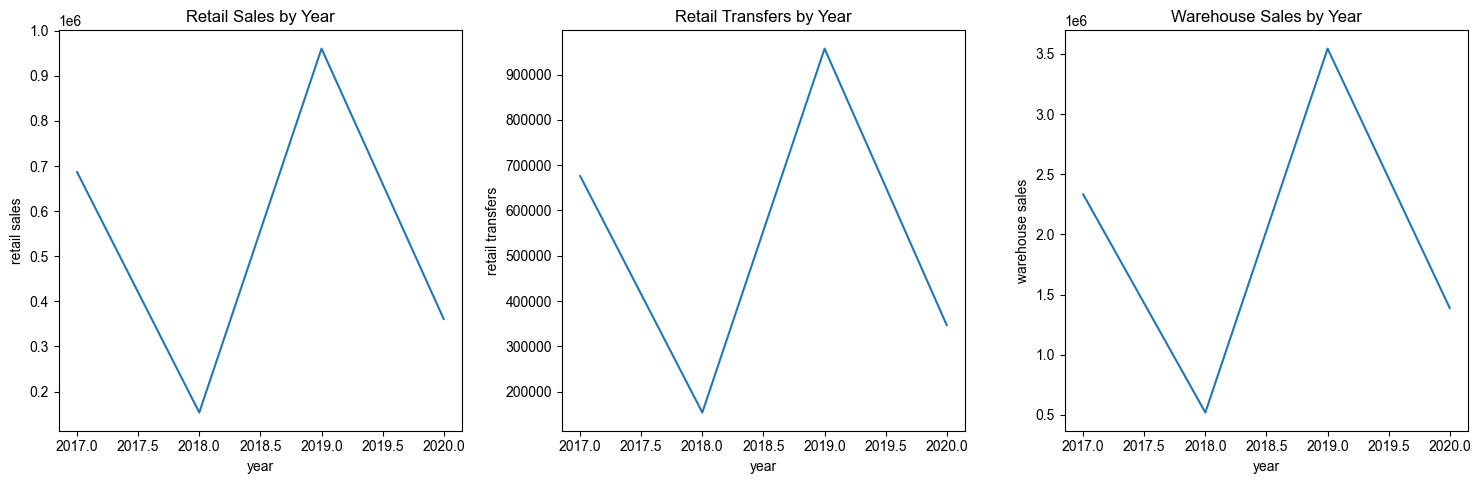

In [11]:
fig, ax= plt.subplots(1, 3, figsize=(15, 5))

# set theme for better look: 
sns.set_theme(style="whitegrid")
sns.lineplot(data=data_yr, x='year', y='retail sales', ax=ax[0])
ax[0].set_title('Retail Sales by Year')
sns.lineplot(data=data_yr, x='year', y='retail transfers', ax=ax[1])
ax[1].set_title('Retail Transfers by Year')
sns.lineplot(data=data_yr, x='year', y='warehouse sales', ax=ax[2])
ax[2].set_title('Warehouse Sales by Year')
plt.tight_layout()
plt.show()

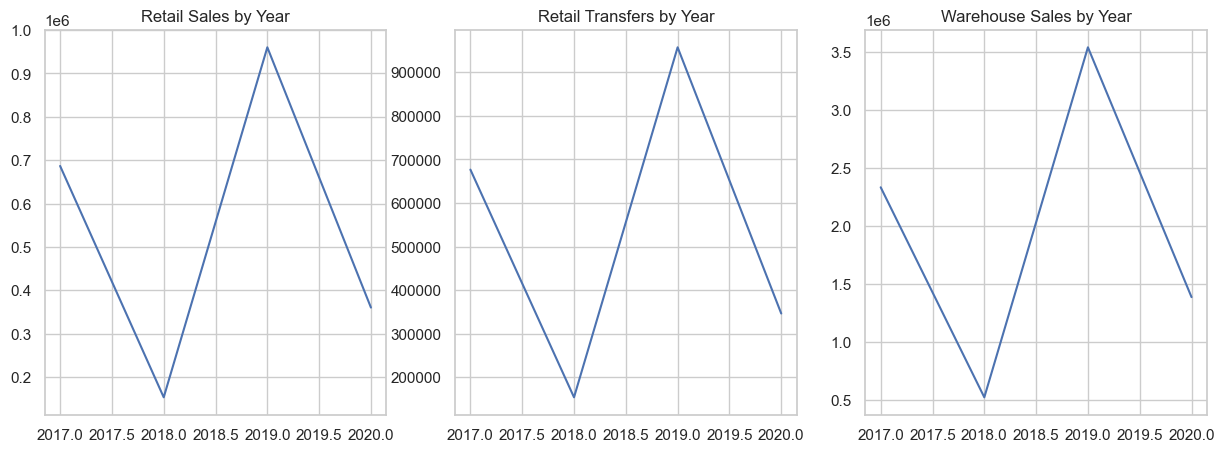

In [12]:
fig, ax= plt.subplots(1, 3, figsize=(15, 5))

# set theme for better look: 
sns.set_theme(style="whitegrid")
ax[0].plot(data_yr['year'], data_yr['retail sales'])
ax[0].set_title('Retail Sales by Year')
ax[1].plot(data_yr['year'], data_yr['retail transfers'])
ax[1].set_title('Retail Transfers by Year')
ax[2].plot(data_yr['year'], data_yr['warehouse sales'])
ax[2].set_title('Warehouse Sales by Year')
plt.show()

So, Retais Sales, Retail Transfer and warehouse Sales all have exactly same trend throught the years. And, as we see the sales are quiet volatile.

----

##### **2. Monthly Sales Trend:**

In [13]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

Here, I have to visualize the monthly sales trend on yearly basis. Also, all three types of sales data shows exactly same trend, I will focus on `retail sales` as it will generalize the trend of other twos too.

In [14]:
data.head(3)

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,jan,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,jan,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0
2,2020,jan,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0


In [15]:
pt= pd.pivot_table(data= data, values= "retail sales", index= 'month',columns= 'year', aggfunc= 'sum', observed=True)

In [16]:
pt.reset_index()

year,month,2017,2018,2019,2020
0,jan,NaN,75791.77,76100.53,74318.770000
1,feb,NaN,77804.13,80113.54,NaN
2,mar,NaN,NaN,84441.04,109411.290000
3,apr,NaN,NaN,80342.58,NaN
4,may,NaN,NaN,94953.10,NaN
5,jun,97357.26,NaN,90860.39,NaN
6,jul,92625.29,NaN,90763.48,94545.984071
7,aug,87111.78,NaN,90628.61,NaN
8,sep,90452.60,NaN,82126.21,82122.728143
9,oct,89236.96,NaN,88230.41,NaN


This table shows the monthly sales trend on yearly basis.

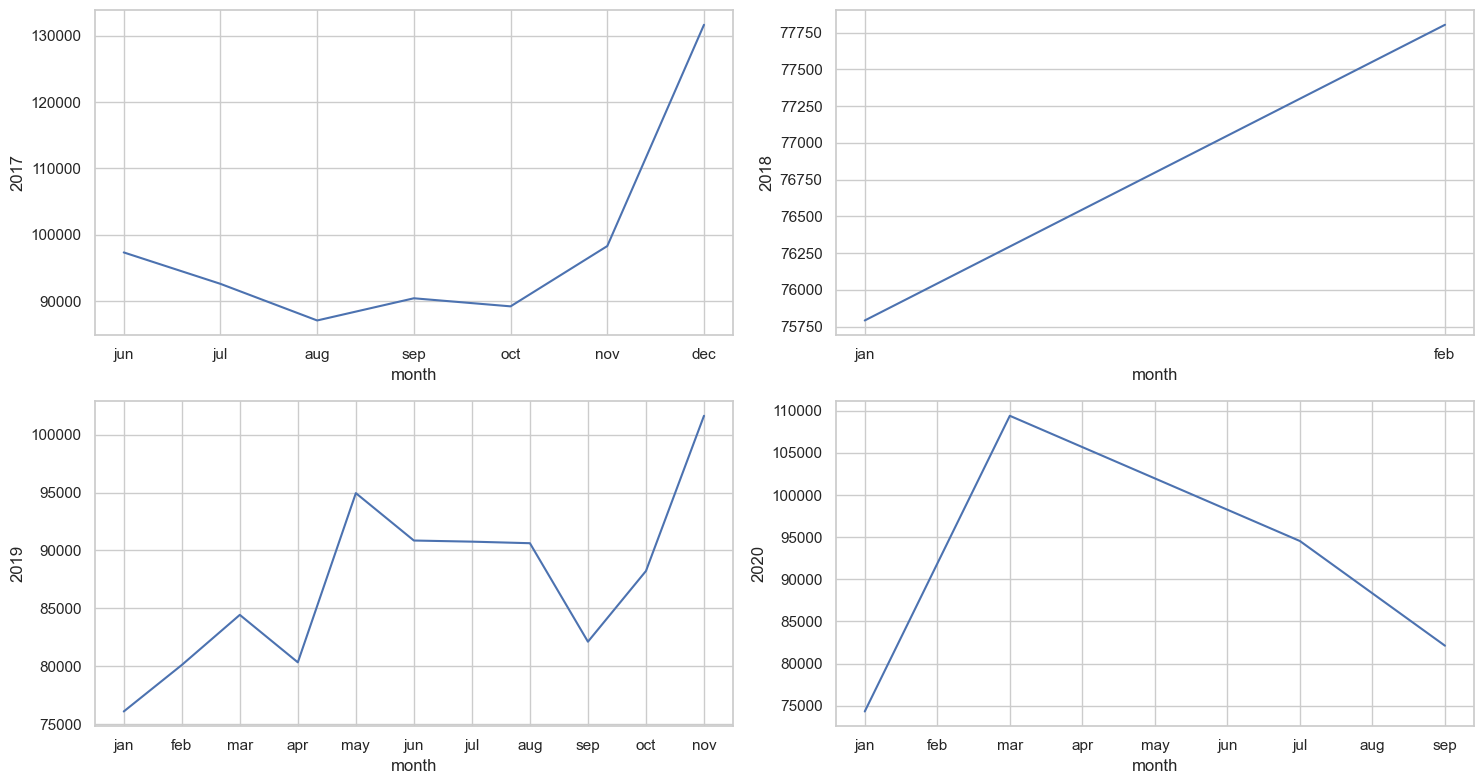

In [17]:
# Plotting in Graphs:
fig, ax= plt.subplots(2, 2, figsize= (15, 8))
sns.set_theme(style= "dark")
sns.lineplot(data= pt, x="month", y= 2017, ax= ax[0,0])
sns.lineplot(data= pt, x="month", y= 2018, ax= ax[0,1])
sns.lineplot(data= pt, x="month", y= 2019, ax= ax[1,0])
sns.lineplot(data= pt, x="month", y= 2020, ax= ax[1, 1])
plt.tight_layout()

-----

##### **4. Top Selling Items:**	

Group by item description, sum retail sales, sort

In [18]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [19]:
data.head(2)

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,jan,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,jan,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0


In [20]:
# Overall Top selling items:
daa= data.groupby(by= "item description")["retail sales"].sum().sort_values(ascending= False).head(10)
daa= daa.reset_index()

In [21]:
daa

,item description,retail sales
0,TITO'S HANDMADE VODKA - 1.75L,27580.50
1,CORONA EXTRA LOOSE NR - 12OZ,25064.00
2,HEINEKEN LOOSE NR - 12OZ,17761.00
3,MILLER LITE 30PK CAN - 12OZ,14440.00
4,BUD LIGHT 30PK CAN,12299.00
5,BOWMAN'S VODKA - 1.75L,12126.72
6,MILLER LITE HIGH GRAPHIC LOOSE NR - 12OZ,10373.77
7,STELLA ARTOIS LOOSE NR - 11.2OZ,10354.00
8,CORONA EXTRA 2/12 NR - 12OZ,9755.19
9,PINNACLE VODKA - 1.75L,8676.40


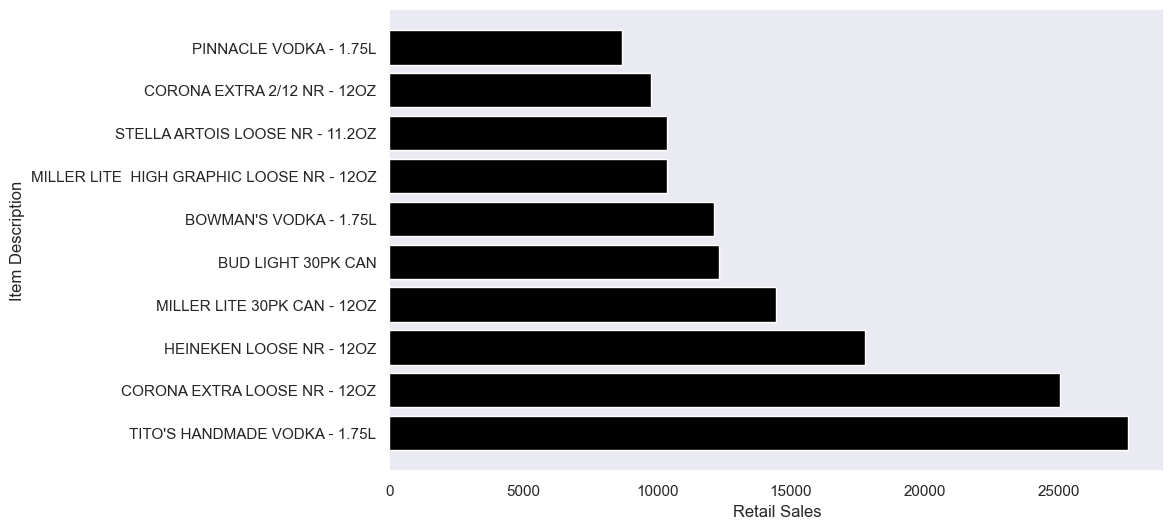

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(y= "item description", width= "retail sales", data= daa, color= "black")
plt.xlabel("Retail Sales")
plt.ylabel("Item Description")
plt.show()

In [23]:
'''# Using Seaborn: 
plt.figure(figsize= (6,6))
sns.barplot(data= daa, x= "retail sales", y= "item description")
plt.show()

# This is not working as the plot takes forever to load. It goes into like infinite loop. 
# Instead use matplotlib bar() plot instead.
'''

'# Using Seaborn: \nplt.figure(figsize= (6,6))\nsns.barplot(data= daa, x= "retail sales", y= "item description")\nplt.show()\n\n# This is not working as the plot takes forever to load. It goes into like infinite loop. \n# Instead use matplotlib bar() plot instead.\n'

##### **5. Yearwise Top Selling Item by Item Type:**

In [24]:
# Yearwise Top Selling Item:  
data.head()

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,jan,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,jan,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,jan,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,jan,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,jan,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [25]:
yw= data.groupby(by= ["year", "item type"])["retail sales"].sum().reset_index()
yw

,year,item type,retail sales
0,2017,BEER,176650.340000
1,2017,DUNNAGE,0.000000
2,2017,KEGS,0.000000
3,2017,LIQUOR,250652.840000
4,2017,NON-ALCOHOL,7796.660000
5,2017,REF,283.580000
6,2017,STR_SUPPLIES,969.140000
7,2017,WINE,250382.010000
8,2018,BEER,35246.640000
9,2018,DUNNAGE,0.000000


In [26]:
data["item type"].unique()

['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE', 'NON-ALCOHOL']
Categories (8, object): ['BEER', 'DUNNAGE', 'KEGS', 'LIQUOR', 'NON-ALCOHOL', 'REF', 'STR_SUPPLIES', 'WINE']

In [27]:
# To filter data for the year 2017:
data_2017 = yw[yw["year"] == 2017]
print(data_2017)

   year     item type  retail sales
0  2017          BEER     176650.34
1  2017       DUNNAGE          0.00
2  2017          KEGS          0.00
3  2017        LIQUOR     250652.84
4  2017   NON-ALCOHOL       7796.66
5  2017           REF        283.58
6  2017  STR_SUPPLIES        969.14
7  2017          WINE     250382.01


In [28]:
# To filter data for the year 2018:
data_2018 = yw[yw["year"] == 2018]
data_2018

,year,item type,retail sales
8,2018,BEER,35246.64
9,2018,DUNNAGE,0.00
10,2018,KEGS,0.00
11,2018,LIQUOR,57432.18
12,2018,NON-ALCOHOL,1545.09
13,2018,REF,65.18
14,2018,STR_SUPPLIES,104.70
15,2018,WINE,59202.11


In [29]:
# To filter data for the year 2017:
data_2019 = yw[yw["year"] == 2019]
print(data_2019)

    year     item type  retail sales
16  2019          BEER     262479.70
17  2019       DUNNAGE          0.00
18  2019          KEGS          0.00
19  2019        LIQUOR     357077.43
20  2019   NON-ALCOHOL      13984.73
21  2019           REF        260.05
22  2019  STR_SUPPLIES       1276.51
23  2019          WINE     325112.78


In [30]:
# To filter data for the year 2017:
data_2020 = yw[yw["year"] == 2020]
print(data_2020)

    year     item type   retail sales
24  2020          BEER   99843.850000
25  2020       DUNNAGE       0.000000
26  2020          KEGS       0.000000
27  2020        LIQUOR  137528.980000
28  2020   NON-ALCOHOL   10778.902214
29  2020           REF      54.820000
30  2020  STR_SUPPLIES     390.530000
31  2020          WINE  111801.690000


Alternatively, I can `pivot` the DataFrame so that each year becomes its own column, making it easier to compare item types across years:

In [31]:
# Pivot the DataFrame: each row is an item type, each column is a 
# year with the retail sales values.
pivoted = yw.pivot(index="item type", columns="year", values="retail sales")
pivoted

year,2017,2018,2019,2020
item type,,,,
BEER,176650.34,35246.64,262479.70,99843.850000
DUNNAGE,0.00,0.00,0.00,0.000000
KEGS,0.00,0.00,0.00,0.000000
LIQUOR,250652.84,57432.18,357077.43,137528.980000
NON-ALCOHOL,7796.66,1545.09,13984.73,10778.902214
REF,283.58,65.18,260.05,54.820000
STR_SUPPLIES,969.14,104.70,1276.51,390.530000
WINE,250382.01,59202.11,325112.78,111801.690000


-----

##### **6. Top Performing Suppliers:**	

In [32]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

Number of Unique values in `"supplier"` column means total number of suppliers in the dataset:

In [33]:
data["supplier"].nunique()
# So, there are 396 suppliers

396

In [34]:
sa= data.groupby(by= "supplier")["retail sales"].sum().sort_values(ascending= False).head(10)

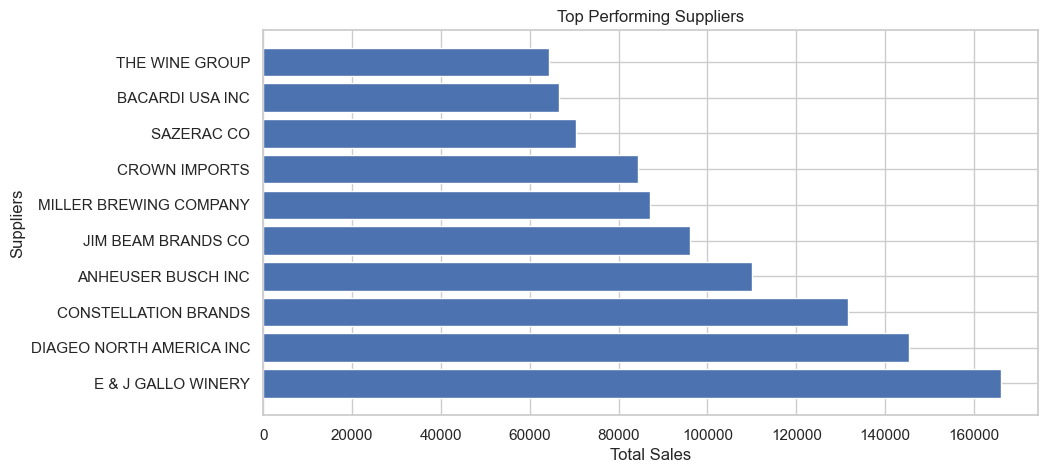

In [35]:
plt.figure(figsize= (10, 5))
# Set theme for this plot:
sns.set_theme(style="whitegrid")
plt.barh(width= sa.values, y= sa.index)
plt.title("Top Performing Suppliers")
plt.xlabel("Total Sales")
plt.ylabel("Suppliers")
plt.show()

---

##### **6. Top Performing Suppliers by Year:**

In [36]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [37]:
sss= data.groupby(by= ["year", "supplier"])["retail sales"].sum()
sss= sss.reset_index()
sss

,year,supplier,retail sales
0,2017,8 VINI INC,2.29
1,2017,A HARDY USA LTD,0.56
2,2017,A I G WINE & SPIRITS,10.19
3,2017,A VINTNERS SELECTIONS,7018.12
4,2017,A&E INC,9.20
...,...,...,...
1579,2020,WITH MALUS AFORETHOUGHT LLC,0.00
1580,2020,YOUNG WON TRADING INC,750.04
1581,2020,YUENGLING BREWERY,3933.81
1582,2020,Z WINE GALLERY IMPORTS LLC,1.73


In [38]:
pvt= pd.pivot_table(data= sss, values= "retail sales", index= "supplier", columns= "year").reset_index()
pvt

year,supplier,2017,2018,2019,2020
0,8 VINI INC,2.29,0.24,0.00,0.00
1,A HARDY USA LTD,0.56,0.00,0.00,0.00
2,A I G WINE & SPIRITS,10.19,2.06,0.99,0.00
3,A VINTNERS SELECTIONS,7018.12,1486.59,978.16,0.00
4,A&E INC,9.20,1.72,0.57,0.00
...,...,...,...,...,...
391,WITH MALUS AFORETHOUGHT LLC,0.00,0.00,0.00,0.00
392,YOUNG WON TRADING INC,826.54,234.20,1578.36,750.04
393,YUENGLING BREWERY,8215.36,1572.68,9305.85,3933.81
394,Z WINE GALLERY IMPORTS LLC,6.94,1.89,8.84,1.73


In [39]:
pd.pivot_table(data= sss, values= "retail sales", index= "supplier", columns= "year").sort_values(by= [2017, 2018, 2019, 2020], ascending= False).head(10)

year,2017,2018,2019,2020
supplier,,,,
E & J GALLO WINERY,55030.39,11568.05,73057.17,26514.92
DIAGEO NORTH AMERICA INC,47326.02,10487.19,64154.99,23375.00
CONSTELLATION BRANDS,42457.36,11413.48,58635.35,19158.60
ANHEUSER BUSCH INC,36062.28,7096.64,48854.72,17947.18
JIM BEAM BRANDS CO,31725.24,7298.23,42013.66,15126.91
MILLER BREWING COMPANY,29913.52,5649.51,38147.43,13445.98
CROWN IMPORTS,23140.57,4103.22,41816.73,15377.14
BACARDI USA INC,22989.84,5001.96,27993.98,10624.45
PERNOD RICARD USA LLC,20815.47,4013.80,23951.83,9007.78


In [40]:
# Top performing suppliers in 2017 by retail sales:
pvt_sup_2017= pvt[["supplier", 2017]]
pvt_sup_2017.sort_values(by=2017, ascending=False).head(10)

year,supplier,2017
108,E & J GALLO WINERY,55030.39
90,DIAGEO NORTH AMERICA INC,47326.02
76,CONSTELLATION BRANDS,42457.36
15,ANHEUSER BUSCH INC,36062.28
173,JIM BEAM BRANDS CO,31725.24
214,MILLER BREWING COMPANY,29913.52
81,CROWN IMPORTS,23140.57
26,BACARDI USA INC,22989.84
251,PERNOD RICARD USA LLC,20815.47
293,SAZERAC CO,20365.54


So, these are the top performing suppliers for 2017.

In [41]:
# Top performing suppliers in 2017 by retail sales:
pvt_sup_2018= pvt[["supplier", 2018]]
pvt_sup_2018.sort_values(by=2018, ascending=False).head(10)

year,supplier,2018
108,E & J GALLO WINERY,11568.05
76,CONSTELLATION BRANDS,11413.48
90,DIAGEO NORTH AMERICA INC,10487.19
173,JIM BEAM BRANDS CO,7298.23
15,ANHEUSER BUSCH INC,7096.64
214,MILLER BREWING COMPANY,5649.51
344,THE WINE GROUP,5579.05
293,SAZERAC CO,5038.58
26,BACARDI USA INC,5001.96
81,CROWN IMPORTS,4103.22


In [42]:
# Top performing suppliers in 2019 by retail sales:
pvt_sup_2019= pvt[["supplier", 2019]]
pvt_sup_2019.sort_values(by=2019, ascending=False).head(10)

year,supplier,2019
108,E & J GALLO WINERY,73057.17
90,DIAGEO NORTH AMERICA INC,64154.99
76,CONSTELLATION BRANDS,58635.35
15,ANHEUSER BUSCH INC,48854.72
173,JIM BEAM BRANDS CO,42013.66
81,CROWN IMPORTS,41816.73
214,MILLER BREWING COMPANY,38147.43
293,SAZERAC CO,31917.85
344,THE WINE GROUP,28859.16
26,BACARDI USA INC,27993.98


In [43]:
# Top performing suppliers in 2020 by retail sales:
pvt_sup_2020= pvt[["supplier", 2020]]
pvt_sup_2020.sort_values(by=2020, ascending=False).head(10)

year,supplier,2020
108,E & J GALLO WINERY,26514.92
90,DIAGEO NORTH AMERICA INC,23375.00
76,CONSTELLATION BRANDS,19158.60
15,ANHEUSER BUSCH INC,17947.18
81,CROWN IMPORTS,15377.14
173,JIM BEAM BRANDS CO,15126.91
214,MILLER BREWING COMPANY,13445.98
293,SAZERAC CO,13092.65
26,BACARDI USA INC,10624.45
43,BOSTON BEER CORPORATION,10616.58


-----

##### **7. Year-over-Year Growth:**

In [44]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [45]:
# Calculate yearly total retail sales
yearly_sales = data.groupby("year")["retail sales"].sum().reset_index()

# Calculate percentage growth from the previous year
yearly_sales["pct_growth"] = yearly_sales["retail sales"].pct_change() * 100

# Display the results
print(yearly_sales)

   year   retail sales  pct_growth
0  2017  686734.570000         NaN
1  2018  153595.900000  -77.633877
2  2019  960191.200000  525.141166
3  2020  360398.772214  -62.465937


----

##### **8. Sales by Item Type:**	

In [46]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [47]:
data["item type"].nunique()

8

So, total of 8 different types of items in the dataset. 

In [48]:
for i in data["item type"].unique():
    print(i) 

WINE
BEER
LIQUOR
STR_SUPPLIES
KEGS
REF
DUNNAGE
NON-ALCOHOL


In [49]:
data.groupby(by= "item type")["retail sales"].sum() 

item type
BEER            574220.530000
DUNNAGE              0.000000
KEGS                 0.000000
LIQUOR          802691.430000
NON-ALCOHOL      34105.382214
REF                663.630000
STR_SUPPLIES      2740.880000
WINE            746498.590000
Name: retail sales, dtype: float64

So, this is the overall sales by item type. Also, in `retail sales`, there are two items having no sales: `DUNNAGE`, `KEGS`. Lets check if they have any sales in `'retail transfers'`, `'warehouse sales'`. 

In [50]:
data.groupby(by= "item type")["retail transfers"].sum() 

item type
BEER            566714.00
DUNNAGE              0.00
KEGS                -1.00
LIQUOR          794735.71
NON-ALCOHOL      26666.38
REF                388.92
STR_SUPPLIES     10846.58
WINE            734618.04
Name: retail transfers, dtype: float64

In [51]:
data.groupby(by= "item type")["warehouse sales"].sum() 

item type
BEER            6527236.51
DUNNAGE         -121454.00
KEGS             118431.00
LIQUOR            94906.27
NON-ALCOHOL       26149.59
REF              -20499.00
STR_SUPPLIES          0.00
WINE            1156985.91
Name: warehouse sales, dtype: float64

So, there are sales and transfer records for these two items, we can proceed further.

We can also calculate `sales by item type per year`: 

In [52]:
res= data.groupby(by= ["year", "item type"])["retail sales"].sum().reset_index()
res

,year,item type,retail sales
0,2017,BEER,176650.340000
1,2017,DUNNAGE,0.000000
2,2017,KEGS,0.000000
3,2017,LIQUOR,250652.840000
4,2017,NON-ALCOHOL,7796.660000
5,2017,REF,283.580000
6,2017,STR_SUPPLIES,969.140000
7,2017,WINE,250382.010000
8,2018,BEER,35246.640000
9,2018,DUNNAGE,0.000000


In [53]:
pd.pivot_table(data= res, values= "retail sales", index= "item type", columns= "year")

year,2017,2018,2019,2020
item type,,,,
BEER,176650.34,35246.64,262479.70,99843.850000
DUNNAGE,0.00,0.00,0.00,0.000000
KEGS,0.00,0.00,0.00,0.000000
LIQUOR,250652.84,57432.18,357077.43,137528.980000
NON-ALCOHOL,7796.66,1545.09,13984.73,10778.902214
REF,283.58,65.18,260.05,54.820000
STR_SUPPLIES,969.14,104.70,1276.51,390.530000
WINE,250382.01,59202.11,325112.78,111801.690000


-----

##### **9. Retail vs Warehouse Sales:**	  

Compare retail sales vs warehouse sales per item

In [54]:
data.head(5)

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,jan,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,jan,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,jan,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,jan,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,jan,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [55]:
print(F' Total Number of Sales in Retail: {data["retail sales"].sum().round()}')

 Total Number of Sales in Retail: 2160920.0


In [56]:
print(F"Total Number of Salles in Retail: {data['warehouse sales'].sum().round()}")

Total Number of Salles in Retail: 7781756.0


In [57]:
# Per year total sales in retail" 
ret= data.groupby(by= "year")["retail sales"].sum().round().reset_index()
ret

,year,retail sales
0,2017,686735.0
1,2018,153596.0
2,2019,960191.0
3,2020,360399.0


In [58]:
# Per year sales in warehouse sales:
rett= data.groupby(by= "year")["warehouse sales"].sum().round().reset_index()
rett

,year,warehouse sales
0,2017,2333849.0
1,2018,519526.0
2,2019,3543371.0
3,2020,1385010.0


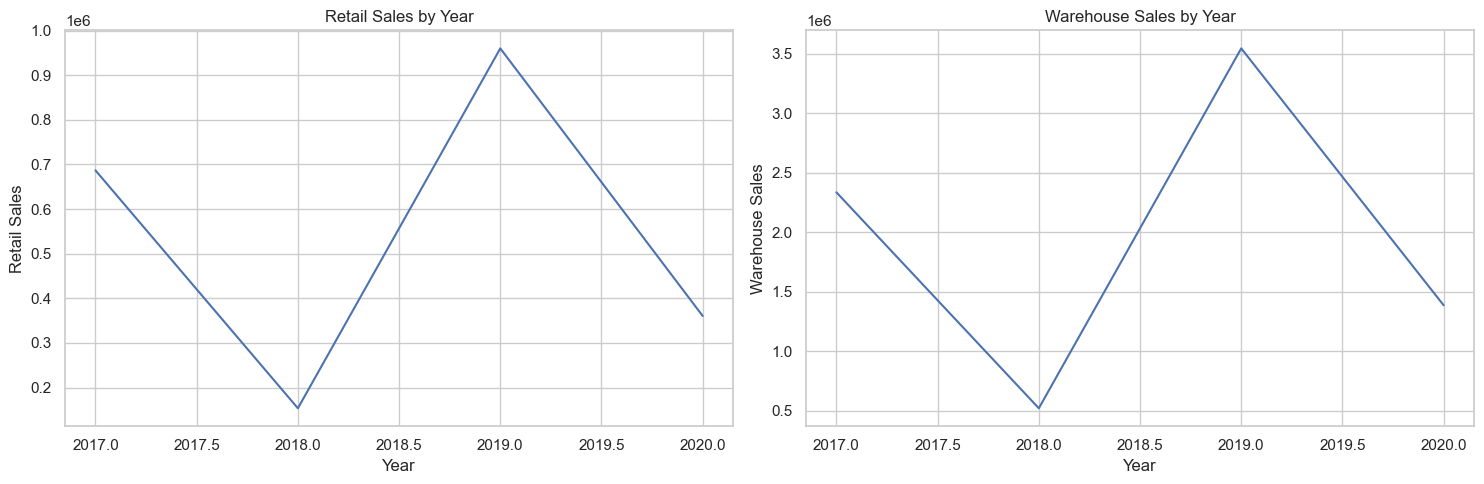

In [59]:
# Comparision of Sales per year:
fig, ax= plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(ret["year"], ret["retail sales"])
ax[0].set_title('Retail Sales by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Retail Sales')

ax[1].plot(rett["year"], rett["warehouse sales"])
ax[1].set_title('Warehouse Sales by Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Warehouse Sales')
plt.tight_layout()
plt.show()

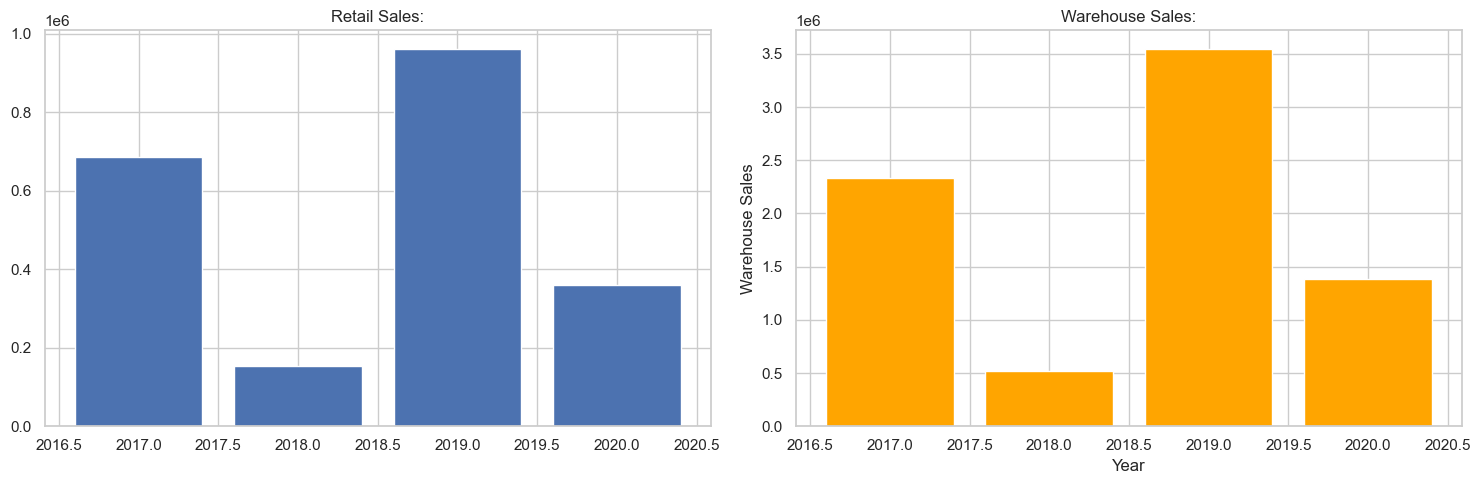

In [60]:
# Comparision of Sales per year:
fig, ax= plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(ret["year"], ret["retail sales"])
ax[0].set_title("Retail Sales:")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Retail Sales") 

ax[1].bar(rett["year"], rett["warehouse sales"], color= "orange")
ax[1].set_title("Warehouse Sales:")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Warehouse Sales")
plt.tight_layout()
plt.show()

In [61]:
# To find the retail sales vs warehouse sales per item:
ota= data.groupby(by= "item type")[["retail sales", "warehouse sales"]].sum()

In [62]:
ota.reset_index()

,item type,retail sales,warehouse sales
0,BEER,574220.530000,6527236.51
1,DUNNAGE,0.000000,-121454.00
2,KEGS,0.000000,118431.00
3,LIQUOR,802691.430000,94906.27
4,NON-ALCOHOL,34105.382214,26149.59
5,REF,663.630000,-20499.00
6,STR_SUPPLIES,2740.880000,0.00
7,WINE,746498.590000,1156985.91


In [63]:
# To find the retail sales vs warehouse sales per item per year:
rspy= data.groupby(by= ['year', "item type"])[["retail sales", "warehouse sales"]].sum()
rspy= rspy.reset_index()
rspy.head(2)

,year,item type,retail sales,warehouse sales
0,2017,BEER,176650.34,1970278.96
1,2017,DUNNAGE,0.00,-40771.00


In [64]:
retail_sales_vs_warehouse_sales_per_item_in_2017= rspy[rspy["year"]== 2017]
retail_sales_vs_warehouse_sales_per_item_in_2017= retail_sales_vs_warehouse_sales_per_item_in_2017[["item type", 'retail sales', "warehouse sales"]]
retail_sales_vs_warehouse_sales_per_item_in_2017

,item type,retail sales,warehouse sales
0,BEER,176650.34,1970278.96
1,DUNNAGE,0.00,-40771.00
2,KEGS,0.00,39001.00
3,LIQUOR,250652.84,25736.63
4,NON-ALCOHOL,7796.66,7739.84
5,REF,283.58,-6604.00
6,STR_SUPPLIES,969.14,0.00
7,WINE,250382.01,338467.70


In [65]:
retail_sales_vs_warehouse_sales_per_item_in_2018= rspy[rspy["year"]== 2018]
retail_sales_vs_warehouse_sales_per_item_in_2018

,year,item type,retail sales,warehouse sales
8,2018,BEER,35246.64,425699.57
9,2018,DUNNAGE,0.00,-10365.00
10,2018,KEGS,0.00,9786.00
11,2018,LIQUOR,57432.18,6643.78
12,2018,NON-ALCOHOL,1545.09,1992.21
13,2018,REF,65.18,-208.00
14,2018,STR_SUPPLIES,104.70,0.00
15,2018,WINE,59202.11,85977.63


In [66]:
retail_sales_vs_warehouse_sales_per_item_in_2019= rspy[rspy["year"]== 2019]
retail_sales_vs_warehouse_sales_per_item_in_2019

,year,item type,retail sales,warehouse sales
16,2019,BEER,262479.70,2961086.69
17,2019,DUNNAGE,0.00,-57465.00
18,2019,KEGS,0.00,57077.00
19,2019,LIQUOR,357077.43,49480.62
20,2019,NON-ALCOHOL,13984.73,12132.91
21,2019,REF,260.05,-12256.00
22,2019,STR_SUPPLIES,1276.51,0.00
23,2019,WINE,325112.78,533315.01


In [67]:
retail_sales_vs_warehouse_sales_per_item_in_2020= rspy[rspy["year"]== 2020]
ppp= retail_sales_vs_warehouse_sales_per_item_in_2020.reset_index()

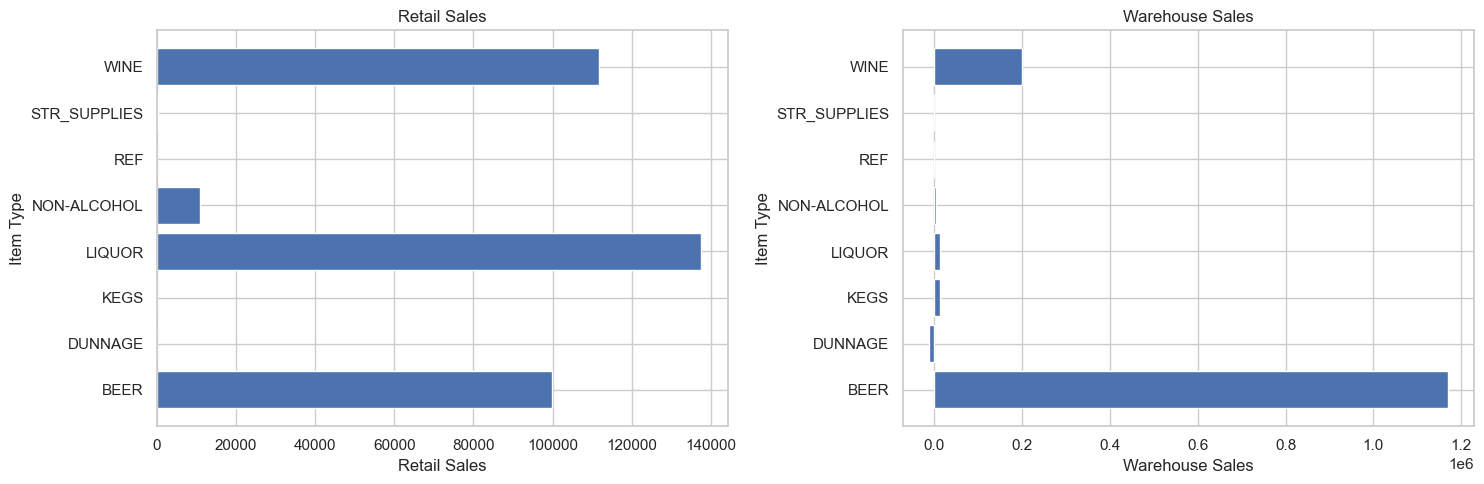

In [68]:
fig, ax= plt.subplots(1, 2, figsize= (15, 5))
ax[0].barh(y= ppp["item type"], width= ppp["retail sales"])
ax[0].set_title("Retail Sales")
ax[0].set_xlabel("Retail Sales")
ax[0].set_ylabel("Item Type")

ax[1].barh(y= ppp["item type"], width= ppp["warehouse sales"])
ax[1].set_title("Warehouse Sales")
ax[1].set_xlabel("Warehouse Sales") 
ax[1].set_ylabel("Item Type")
plt.tight_layout()
plt.show()

----

##### **10. Inventory Movement Efficiency:**	

Ratio of retail sales / warehouse sales

In [69]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [70]:
# To find the ratio of retail sales to warehouse sales per year:
dass= data.groupby(by= "year")[["retail sales", 'warehouse sales']].sum().round()
dass

,retail sales,warehouse sales
year,,
2017,686735.0,2333849.0
2018,153596.0,519526.0
2019,960191.0,3543371.0
2020,360399.0,1385010.0


In [71]:
# Compute the ratio of retail sales to warehouse sales by applying on rows:
ratio = dass.apply(lambda row: row["retail sales"] / row["warehouse sales"], axis=1)
print(ratio)

year
2017    0.294250
2018    0.295646
2019    0.270982
2020    0.260214
dtype: float64


In [72]:
# Compute the ratio of retail sales to warehouse sales by applying on rows:
ratio = dass.apply(lambda row: row["retail sales"] / row["warehouse sales"]*100, axis=1)
print(ratio)

year
2017    29.424997
2018    29.564642
2019    27.098235
2020    26.021401
dtype: float64


In [73]:
# To find the overall ratio of retail sales to warehouse sales:
print(F" {data["retail sales"].sum().round()/ data["warehouse sales"].sum().round()*100}%")

 27.769053668606418%


The value indicates that overall, the retail sales total is about `27.77%` of the warehouse sales total. In other words, for every 100 units sold from the warehouse, roughly 27.77 units are being sold at the retail level.

----

##### **11.Retail Transfers Trend:**	

In [74]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

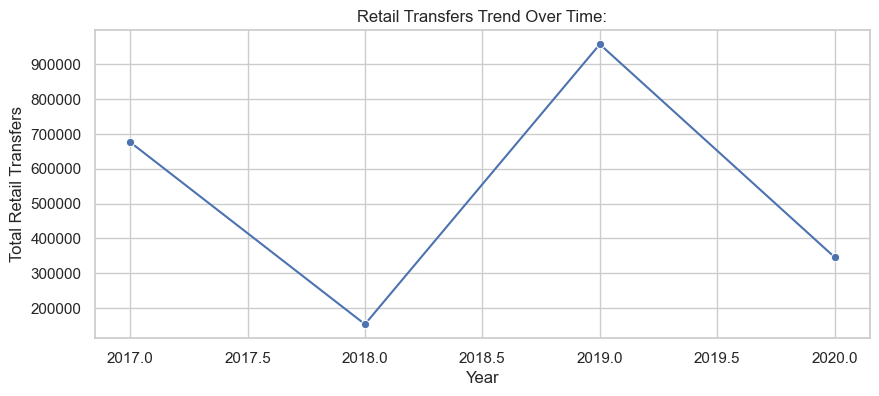

In [75]:
# Aggregate total retail transfers per year
retail_transfers_yearly = data.groupby("year")["retail transfers"].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 4))
sns.set_theme(style="whitegrid")
sns.lineplot(data=retail_transfers_yearly, x="year", y="retail transfers", marker="o")
plt.title("Retail Transfers Trend Over Time:")
plt.xlabel("Year")
plt.ylabel("Total Retail Transfers")
plt.show()

The plot indicates that while there is high variation in overall `retail transfers` across the years, the current year has both a higher minimum and a higher maximum compared to previous years. This suggests that even though the transfers fluctuate widely year-to-year, the baseline level of transfers (minima) and the peak transfers (maxima) have both increased, potentially reflecting overall growth or changes in operational thresholds.

----

##### **12. Item Transfer Intensity:**	

Items with high retail transfers

In [76]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [77]:
sr= data.groupby(by= "item type")["retail transfers"].sum().reset_index().sort_values(by= "retail transfers", ascending= False)
sr

,item type,retail transfers
3,LIQUOR,794735.71
7,WINE,734618.04
0,BEER,566714.00
4,NON-ALCOHOL,26666.38
6,STR_SUPPLIES,10846.58
5,REF,388.92
1,DUNNAGE,0.00
2,KEGS,-1.00


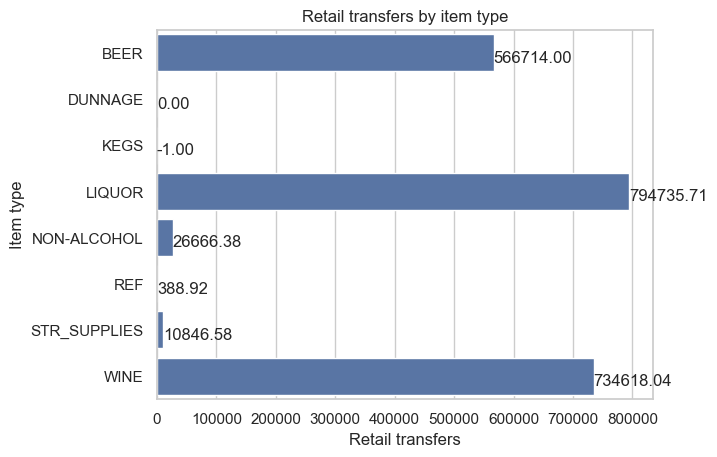

In [78]:
ax= sns.barplot(data= sr, y= "item type", x= "retail transfers")
# Write corresponding number for each bar:
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2. + 0.1), ha='left', va='center')
ax.set_title("Retail transfers by item type")
ax.set_xlabel("Retail transfers")
ax.set_ylabel("Item type")
plt.show()

In [79]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [80]:
# Item tranfer Intensity using item description:
daat= data.groupby(by= "item description")["retail transfers"].sum().round().sort_values(ascending= False).head(10).reset_index()
daat

,item description,retail transfers
0,TITO'S HANDMADE VODKA - 1.75L,27889.0
1,CORONA EXTRA LOOSE NR - 12OZ,24350.0
2,HEINEKEN LOOSE NR - 12OZ,16964.0
3,MILLER LITE 30PK CAN - 12OZ,14045.0
4,BUD LIGHT 30PK CAN,12120.0
5,BOWMAN'S VODKA - 1.75L,11945.0
6,MILLER LITE HIGH GRAPHIC LOOSE NR - 12OZ,10243.0
7,STELLA ARTOIS LOOSE NR - 11.2OZ,9995.0
8,CORONA EXTRA 2/12 NR - 12OZ,9312.0
9,PINNACLE VODKA - 1.75L,8559.0


In [81]:
# sns.barplot(data= daat, x= "retail transfers", y= "item description")

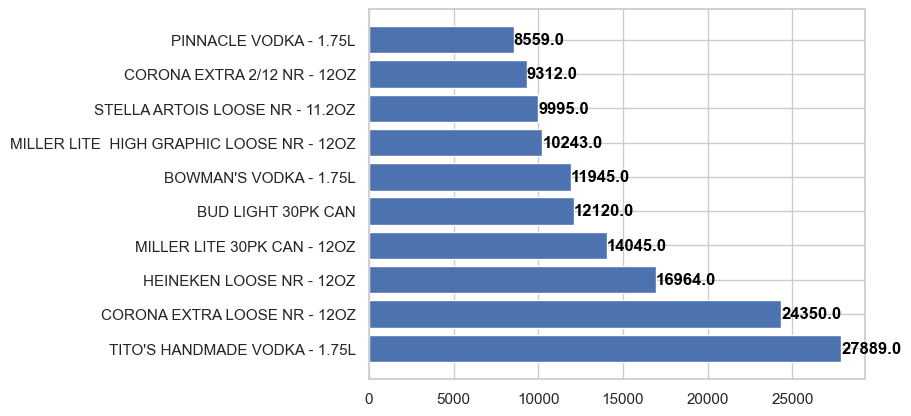

In [82]:
plt.barh(y= daat["item description"], width= daat["retail transfers"])
# write actual data labels for each bar
for i, v in enumerate(daat["retail transfers"]):
    plt.text(v, i, str(v), color='black', va='center', fontweight='bold')

-----

##### **13. Warehouse Stock Utilization:**	

High warehouse sales but low retail = slow movement

In [83]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [91]:
# Overall warehouse sales and retail sales comparision:
retaiii = data["retail sales"].sum().round()
ware = data["warehouse sales"].sum().round()
print("Overall warehouse sales:", ware)
print("Overall retail sales:", retaiii)

# SO, the stock accumulation rate is:
stock_accumulation_rate = retaiii / ware * 100
print("Stock Accumulation Rate (%):", stock_accumulation_rate.round())

Overall warehouse sales: 7781756.0
Overall retail sales: 2160920.0
Stock Accumulation Rate (%): 28.0


On average, `77,81,756 sales were performed from Warehouse` whereas `21,60,929 sales were done in retail sales`. 

In [93]:
# to  calculate the warehouse sales and retsil sales comparision on yearly basis:
data.groupby(by= "year")[["retail sales", "warehouse sales"]].sum().round().reset_index()

,year,retail sales,warehouse sales
0,2017,686735.0,2333849.0
1,2018,153596.0,519526.0
2,2019,960191.0,3543371.0
3,2020,360399.0,1385010.0


In [ ]:
data.gro